<h3 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600; text-align: center'>Compact Letter Displays (Statistically Significant Letters)</h3>

---

<span style='font-size: 20px; color: Purple; font-family: Dubai; font-weight: 600; text-align: center'>About Compact Letter Displays</span>

A **compact letter display** refers to a concise, visually efficient format for presenting written content, typically used for letters or messages that need to convey key information without excess detail or elaboration. It focuses on brevity, using clear language and a structured format, often incorporating bullet points or numbered lists for quick comprehension. The layout is designed to maximize the use of space while maintaining readability, making it ideal for professional communication where space is limited, such as in business correspondence or official notices. The goal is to communicate the necessary message clearly and effectively, without overwhelming the reader with unnecessary information.

From an analytical perspective, a compact letter display can be seen as a method to optimize the efficiency of communication, especially when the goal is to convey important information within a limited space or time. It involves strategic content selection, where only essential data is included, and non-critical information is omitted or condensed. This approach is often driven by the need to maximize the impact of each element of the message, ensuring that key insights or actions are highlighted while minimizing cognitive load on the reader. In data analysis or reporting, this could parallel the use of summaries, dashboards, or executive reports, where the aim is to present complex datasets or findings in a simplified, digestible form. It is crucial for improving decision-making speed, as it reduces the time spent on sifting through unnecessary information, allowing the reader to focus on what truly matters.

<span style='font-size: 20px; color: Purple; font-family: Dubai; font-weight: 600; text-align: center'>Objective of the Project</span>

The main objective of this project is to facilitate the analysis and comparison of numerical data across specified groups in a structured and visually interpretable manner. 

**The key goals of the project include:**


1. **Data Summarization**:   Compute summary statistics, specifically, **Mean**(Average value of each numerical parameter within groups), **SEM (Standard Error of the Mean)**(To quantify the precision of the mean), **CV% (Coefficient of Variation)**(To measure relative variability across groups).  

2. **Compact Letter Display (CLD)**: Perform statistical comparisons across groups to compute compact letter displays. Summarize the resulting CLD in a structured DataFrame for easy interpretation and comparisons.

3. **Data Visualization**: Visualize the compact letter display and associated summary statistics using various types of plots to enable clear and intuitive comparisons between groups.

This project will enable better understanding of group-wise variations and facilitate comparisons through statistical summaries, tabular data, and visualizations.

<h3 style='font-size: 35px; color: Tomato; font-family: Amperzand; font-weight: 600'>Import Required Libraries</h3>

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols as smf_ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
import pandas as pd
import string

print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h3 style='font-size: 35px; color: Tomato; font-family: Amperzand; font-weight: 600'>Import and Preprocessing Dataset</h3>

In [35]:
df = pd.read_excel('Datasets/Weeding Management.xlsx')
df.sample(5)

,Treatments,Replication,Plant height,Leaf number,Fresh biomass (g),Dry biomass (g),Days to 1st flowering,Number of pods per plant,Number of seed per pods,Weight of 100 seeds (g),Yield (g)
105,Hoeing And Weed Removal,3,19.8500,10.425,50.182,-8.908,32.5,16.2,11.6,30.32,1135.99
25,Hoeing And Weed Removal,1,34.9000,-1.925,46.446,7.814,23.3,21.3,3.7,36.00,1777.81
107,Mulching,3,29.9750,-0.350,53.930,15.117,16.3,18.9,5.5,29.43,2434.42
96,No Weed Management,1,40.9625,9.325,34.014,-2.412,46.5,4.3,4.2,31.17,1192.99
72,No Weed Management,1,35.9625,7.325,38.014,0.588,40.5,6.3,3.2,32.17,1188.99


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>1.1: Dataset Informations/ Overview</h4>

In [5]:
df.shape

(144, 11)

In [6]:
df.columns

Index(['Treatments', 'Replication', 'Plant height', 'Leaf number',
       'Fresh biomass (g)', 'Dry biomass (g)', 'Days to 1st flowering',
       'Number of pods per plant', 'Number of seed per pods',
       'Weight of 100 seeds (g)', 'Yield (g)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Treatments                144 non-null    object 
 1   Replication               144 non-null    int64  
 2   Plant height              144 non-null    float64
 3   Leaf number               144 non-null    float64
 4   Fresh biomass (g)         144 non-null    float64
 5   Dry biomass (g)           144 non-null    float64
 6   Days to 1st flowering     144 non-null    float64
 7   Number of pods per plant  144 non-null    float64
 8   Number of seed per pods   144 non-null    float64
 9   Weight of 100 seeds (g)   144 non-null    float64
 10  Yield (g)                 144 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 12.5+ KB


In [8]:
df.dtypes

Treatments                   object
Replication                   int64
Plant height                float64
Leaf number                 float64
Fresh biomass (g)           float64
Dry biomass (g)             float64
Days to 1st flowering       float64
Number of pods per plant    float64
Number of seed per pods     float64
Weight of 100 seeds (g)     float64
Yield (g)                   float64
dtype: object

In [37]:
df.drop(columns=['Replication'], inplace=True)

In [10]:
df.head()

,Treatments,Plant height,Leaf number,Fresh biomass (g),Dry biomass (g),Days to 1st flowering,Number of pods per plant,Number of seed per pods,Weight of 100 seeds (g),Yield (g)
0,No Weed Management,33.9625,5.325,37.014,8.588,28.5,11.3,5.2,36.17,1189.99
1,Hoeing And Weed Removal,30.9000,5.075,41.446,8.814,22.3,17.3,4.7,39.00,1775.81
2,Herbicide,38.1250,5.500,46.648,9.956,23.7,15.6,5.0,41.18,1798.74
3,Mulching,33.0625,5.675,82.596,16.637,26.5,21.2,5.3,37.05,2331.25
4,No Weed Management,25.7375,5.075,45.651,8.947,27.7,13.0,4.4,33.36,1068.59


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>1.3: Handling Missing Values</h4>

In [11]:
df.isnull().sum()

Treatments                  0
Plant height                0
Leaf number                 0
Fresh biomass (g)           0
Dry biomass (g)             0
Days to 1st flowering       0
Number of pods per plant    0
Number of seed per pods     0
Weight of 100 seeds (g)     0
Yield (g)                   0
dtype: int64

<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>1.4: Handling Outliers Using IQR</h4>

In [12]:
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    return data, outlier_counts

numerical_columns = df.select_dtypes(include=['number'])
df, outlier_counts = remove_outliers_iqr(df, numerical_columns)

total_length = 100 
print(f"\n {' ' * 35}Outliers Detected (Count):")
for col, count in outlier_counts.items():
    Text_length = len(col)
    remaining_length = total_length - Text_length - len(str(count)) - 3
    print(f"{col} : {'.' * remaining_length}{count}")


                                    Outliers Detected (Count):
Plant height : ....................................................................................5
Leaf number : .....................................................................................3
Fresh biomass (g) : ..............................................................................16
Dry biomass (g) : .................................................................................1
Days to 1st flowering : ...........................................................................6
Number of pods per plant : ........................................................................1
Number of seed per pods : .........................................................................9
Weight of 100 seeds (g) : .........................................................................1
Yield (g) : .......................................................................................0


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>1.5: Renaming Columns</h4>

In [13]:
import re

def rename(ColumnName):
    Col = re.sub(r'\(', 'Paranthesis1', ColumnName) 
    Col = re.sub(r'\)', 'Paranthesis2', Col)
    Col = re.sub(r'\%', 'Percentage', Col)
    #Col = re.sub(r'\°', 'Centigrade', Col)
    
    
    RenamedColumns = re.sub(r' ', '_', Col)
    return RenamedColumns

def restore_name(RenamedColumns):
    Col = re.sub(r'_', ' ', RenamedColumns)
    Col = re.sub(r'Paranthesis2', ')', Col)
    Col = re.sub(r'Paranthesis1', '(', Col)
    Col =  re.sub('Percentage', '%', Col)
    #Col = re.sub(r'\Centigrade', '°', Col)
    
    return Col


def rename_column_content(value):
    value = re.sub(r'Paranthesis1', '(', value)
    value = re.sub(r'Paranthesis2', ')', value)
    value = value.replace('_', ' ')
    value = value.replace('Percentage', ' %')
    return value


# Test the functions
renamed = rename(ColumnName='Plant Height (cm)')
restored = restore_name(renamed)

print(f"Renamed: {renamed}")
print(f"Restored: {restored}")

Renamed: Plant_Height_Paranthesis1cmParanthesis2
Restored: Plant Height (cm)


<h2 style='font-size: 35px; color: Tomato; font-family: Amperzand; font-weight: 600'>2.0: Statistic Description of The Datasets</h2>

<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>2.1: Overall Statistic Description of The Datasets</h4>

In [14]:
df.describe()

,Plant height,Leaf number,Fresh biomass (g),Dry biomass (g),Days to 1st flowering,Number of pods per plant,Number of seed per pods,Weight of 100 seeds (g),Yield (g)
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,32.583088,4.288725,53.090049,8.545794,22.304902,15.344118,5.505882,36.455686,1625.132549
std,6.550514,5.435417,12.335186,6.131517,5.760885,6.490245,3.789115,4.182011,506.702799
min,15.837500,-9.925000,35.014000,-8.908000,9.300000,-0.200000,-3.800000,29.160000,783.730000
25%,28.975000,1.237500,44.764250,4.883000,18.000000,11.475000,3.300000,33.330000,1185.240000
50%,32.981250,5.300000,49.017000,8.272000,22.250000,16.650000,5.300000,36.170000,1672.905000
75%,37.565625,7.750000,60.968250,12.883000,25.700000,20.275000,7.900000,39.140000,1868.190000
max,44.700000,15.675000,90.596000,21.637000,39.500000,27.900000,14.300000,46.850000,2443.420000


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>2.2: Single-variable  Statistics Descriptions </h4>

In [15]:
rp.summary_cont(df['Plant height'].groupby(df['Treatments']))

,N,Mean,SD,SE,95% Conf.,Interval
Treatments,,,,,,
Herbicide,32,33.9562,8.7037,1.5386,30.8182,37.0943
Hoeing And Weed Removal,28,30.4777,4.9058,0.9271,28.5754,32.3800
Mulching,20,28.8100,2.2401,0.5009,27.7616,29.8584
No Weed Management,22,36.6955,4.3593,0.9294,34.7627,38.6283


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>2.2: Group-wise  Variables Statistics Distributions </h4>

In [16]:
from scipy.stats import skew, kurtosis
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

       
        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

result = compute_overall_distribution_stats(df)
result

<IPython.core.display.Javascript object>

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,Plant height,32.583088,32.98125,26.975,6.550514,42.909228,28.8625,-0.430877,-0.385802
1,Leaf number,4.288725,5.30000,6.050,5.435417,29.543758,25.6000,-0.496953,-0.020548
2,Fresh biomass (g),53.090049,49.01700,44.446,12.335186,152.156815,55.5820,1.282115,1.191892
3,Dry biomass (g),8.545794,8.27200,6.814,6.131517,37.595503,30.5450,-0.217569,0.137463
4,Days to 1st flowering,22.304902,22.25000,21.500,5.760885,33.187798,30.2000,0.340415,0.039678
5,Number of pods per plant,15.344118,16.65000,11.300,6.490245,42.123282,28.1000,-0.596901,-0.485904
6,Number of seed per pods,5.505882,5.30000,9.300,3.789115,14.357391,18.1000,0.040528,0.001560
7,Weight of 100 seeds (g),36.455686,36.17000,35.150,4.182011,17.489217,17.6900,0.304472,-0.374948
8,Yield (g),1625.132549,1672.90500,1478.840,506.702799,256747.727009,1659.6900,0.035975,-0.894095


<h4 style='font-size: 25px; color: Green; font-family: Amperzand; font-weight: 600'>2.2: Group-wise  Statistics Descriptions </h4>

In [17]:
def summary_stats(df, Metrics, group=None):
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df

Metrics = df.select_dtypes(include=np.number).columns.tolist()
final_df = summary_stats(df, Metrics, group='Treatments')
final_df

<IPython.core.display.Javascript object>

,Treatments,Plant height,Leaf number,Fresh biomass (g),Dry biomass (g),Days to 1st flowering,Number of pods per plant,Number of seed per pods,Weight of 100 seeds (g),Yield (g)
0,Herbicide,33.96 ± 1.54,3.06 ± 0.91,53.16 ± 1.57,8.40 ± 0.75,20.27 ± 0.72,13.11 ± 0.85,5.09 ± 0.74,37.65 ± 0.75,1621.84 ± 25.65
1,Hoeing And Weed Removal,30.48 ± 0.93,4.14 ± 1.23,51.81 ± 1.70,4.49 ± 1.16,21.44 ± 0.83,18.77 ± 0.49,6.17 ± 0.56,37.02 ± 0.93,1602.16 ± 62.48
2,Mulching,28.81 ± 0.50,4.66 ± 1.38,65.70 ± 3.63,16.62 ± 0.59,19.48 ± 1.19,22.42 ± 0.47,6.62 ± 0.68,35.18 ± 0.62,2394.25 ± 10.71
3,No Weed Management,36.70 ± 0.93,5.92 ± 0.63,43.16 ± 0.86,6.57 ± 0.71,28.93 ± 1.03,7.80 ± 1.07,4.25 ± 0.95,35.16 ± 0.79,959.95 ± 39.04
4,Grand Mean,32.583088,4.288725,53.090049,8.545794,22.304902,15.344118,5.505882,36.455686,1625.132549
5,SEM,0.648597,0.538186,1.221365,0.607111,0.570413,0.64263,0.375178,0.414081,50.171053
6,%CV,20.104029,126.737349,23.23446,71.748946,25.827888,42.297936,68.819392,11.471492,31.179167


<h2 style='font-size: 35px; color: crimson; font-family: Amperzand; font-weight: 600'>4.0: Tukey's Honest Significant Difference (THSD)</h2>

- To determine which specific group means are significantly different from each other

In [19]:
def Turkey_results(df, group=''):
    results_data = []
    for metric in Metrics:
        turkey_results = pairwise_tukeyhsd(endog=df[metric], groups=df[group], alpha=0.05)
        results_table = turkey_results.summary()
        
        for i in range(1, len(results_table)):
            row = results_table.data[i]
            results_data.append({
                'Metric': metric,
                'Group1': row[0],
                'Group2': row[1],
                'Mean Difference': row[2],
                'P-Value': row[3],
                'Lower CI': row[4],
                'Upper CI': row[5],
                'Reject Null': row[6]
            })
        
        result_df = pd.DataFrame(results_data)
    return result_df
TurkeyTable1 = Turkey_results(df, group='Treatments')
TurkeyTable1

,Metric,Group1,Group2,Mean Difference,P-Value,Lower CI,Upper CI,Reject Null
0,Plant height,Herbicide,Hoeing And Weed Removal,-3.4786,0.1168,-7.5163,0.5591,False
1,Plant height,Herbicide,Mulching,-5.1462,0.0165,-9.5938,-0.6987,True
2,Plant height,Herbicide,No Weed Management,2.7392,0.3522,-1.5822,7.0606,False
3,Plant height,Hoeing And Weed Removal,Mulching,-1.6677,0.7756,-6.2358,2.9004,False
4,Plant height,Hoeing And Weed Removal,No Weed Management,6.2178,0.0023,1.7724,10.6631,True
5,Plant height,Mulching,No Weed Management,7.8855,0.0003,3.0648,12.7061,True
6,Leaf number,Herbicide,Hoeing And Weed Removal,1.0835,0.8664,-2.5788,4.7457,False
7,Leaf number,Herbicide,Mulching,1.6006,0.7282,-2.4334,5.6347,False
8,Leaf number,Herbicide,No Weed Management,2.8656,0.2302,-1.0539,6.7852,False
9,Leaf number,Hoeing And Weed Removal,Mulching,0.5171,0.9879,-3.6262,4.6605,False


<h2 style='font-size: 35px; color: Tomato; font-family: Amperzand; font-weight: 600'>5.0: Compact Letter Display (CLD)</h2>

In [22]:
def Compact_letters_display(df, Factor='', exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
        
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    def calculate_stats_for_column(col_name):
        # Perform OLS and ANOVA
        model = smf_ols(f'{col_name}~C({Factor})', data=df).fit()
        anova_results = anova_lm(model)
        
        # Extract p-value from ANOVA
        p_value = anova_results.loc[f'C({Factor})', 'PR(>F)']
        
        # Perform Tukey's test
        tukey = pairwise_tukeyhsd(df[col_name], df[Factor])
        Turkey_results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        group_labels = letters(Turkey_results)
        
        # Calculate statistics
        stats = df.groupby(Factor)[col_name].agg(['mean', 'sem']).round(2)
        stats['letter'] = stats.index.map(group_labels)
        stats['formatted'] = stats.apply(
            lambda x: f"{x['mean']:.2f} ± {x['sem']:.2f} {x['letter']}", axis=1)
        
        return stats['formatted'], p_value
    
    # Process each numerical column
    results = {}
    p_values = {}
    for col in numeric_cols:
        results[col], p_values[col] = calculate_stats_for_column(col)
    
    # Create the main results DataFrame
    results_df = pd.DataFrame(results)
    results_df.index.name = Factor
    
    # Add p-values row
    p_values_formatted = {col: f"{p:.4f}" + ('***' if p <= 0.001 else '**' if p <= 0.01 else '*' if p <= 0.05 else 'ns') 
                         for col, p in p_values.items()}
    p_value_df = pd.DataFrame([p_values_formatted], index=['p-value'])
    
    # Combine results with p-values
    final_results = pd.concat([results_df, p_value_df])
    
    return final_results

def letters(df, alpha=0.05):
    df["p-adj"] = df["p-adj"].astype(float)
    group1 = set(df.group1.tolist())
    group2 = set(df.group2.tolist())
    groupSet = group1 | group2
    groups = list(groupSet)
    letters = list(string.ascii_lowercase)[:len(groups)]
    cldgroups = letters
    cld = pd.DataFrame(list(zip(groups, letters, cldgroups)))
    cld[3] = ""
    
    for row in df.itertuples():
        if df["p-adj"][row[0]] > alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 2] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 2] += cld.loc[groups.index(df["group1"][row[0]]), 1]
        if df["p-adj"][row[0]] < alpha:
            cld.loc[groups.index(df["group1"][row[0]]), 3] += cld.loc[groups.index(df["group2"][row[0]]), 1]
            cld.loc[groups.index(df["group2"][row[0]]), 3] += cld.loc[groups.index(df["group1"][row[0]]), 1]
    
    cld[2] = cld[2].apply(lambda x: "".join(sorted(x)))
    cld[3] = cld[3].apply(lambda x: "".join(sorted(x)))
    cld.rename(columns={0: "groups"}, inplace=True)
    cld = cld.sort_values(cld.columns[2], key=lambda x: x.str.len())
    cld["labels"] = ""
    letters = list(string.ascii_lowercase)
    unique = []
    
    for item in cld[2]:
        for fitem in cld["labels"].unique():
            for c in range(len(fitem)):
                if not set(unique).issuperset(set(fitem[c])):
                    unique.append(fitem[c])
        g = len(unique)
        for kitem in cld[1]:
            if kitem in item:
                if cld.loc[cld[1] == kitem, "labels"].iloc[0] == "":
                    cld.loc[cld[1] == kitem, "labels"] += letters[g]
                if kitem in " ".join(cld.loc[cld["labels"] == letters[g], 3]):
                    g = len(unique) + 1
                if len(set(cld.loc[cld[1] == kitem, "labels"].iloc[0]).intersection(cld.loc[cld[2] == item, "labels"].iloc[0])) <= 0:
                    if letters[g] not in list(cld.loc[cld[1] == kitem, "labels"].iloc[0]):
                        cld.loc[cld[1] == kitem, "labels"] += letters[g]
                    if letters[g] not in list(cld.loc[cld[2] == item, "labels"].iloc[0]):
                        cld.loc[cld[2] == item, "labels"] += letters[g]
    
    cld = cld.sort_values("labels")
    cld.drop(columns=[1, 2, 3], inplace=True)
    cld = dict(zip(cld["groups"], cld["labels"]))
    return cld


In [23]:
df.columns = df.columns.to_series().apply(rename)
cld = Compact_letters_display(df, Factor='Treatments')
cld.columns = cld.columns.to_series().apply(rename_column_content)
cld.to_csv("Results/Compact Letter Display Summary.csv", index=False)
cld

<IPython.core.display.Javascript object>

,Plant height,Leaf number,Fresh biomass (g),Dry biomass (g),Days to 1st flowering,Number of pods per plant,Number of seed per pods,Weight of 100 seeds (g),Yield (g)
Herbicide,33.96 ± 1.54 bc,3.06 ± 0.91 a,53.16 ± 1.57 c,8.40 ± 0.75 c,20.27 ± 0.72 b,13.11 ± 0.85 c,5.09 ± 0.74 a,37.65 ± 0.75 a,1621.84 ± 25.65 c
Hoeing And Weed Removal,30.48 ± 0.93 ac,4.14 ± 1.23 a,51.81 ± 1.70 c,4.49 ± 1.16 b,21.44 ± 0.83 b,18.77 ± 0.49 b,6.17 ± 0.56 a,37.02 ± 0.93 a,1602.16 ± 62.48 c
Mulching,28.81 ± 0.50 a,4.66 ± 1.38 a,65.70 ± 3.63 a,16.62 ± 0.59 a,19.48 ± 1.19 b,22.42 ± 0.47 a,6.62 ± 0.68 a,35.18 ± 0.62 a,2394.25 ± 10.71 a
No Weed Management,36.70 ± 0.93 b,5.92 ± 0.63 a,43.16 ± 0.86 b,6.57 ± 0.71 bc,28.93 ± 1.03 a,7.80 ± 1.07 d,4.25 ± 0.95 a,35.16 ± 0.79 a,959.95 ± 39.04 b
p-value,0.0001***,0.2932ns,0.0000***,0.0000***,0.0000***,0.0000***,0.1453ns,0.0669ns,0.0000***


<h3 style='font-size: 25px; color: crimson; font-family: Amperzand; font-weight: 600'>5.1: Compact Letter Display (CLD) Visualization</h3>

In [27]:
df.columns = df.columns.to_series().apply(restore_name)
df.columns

Index(['Treatments', 'Plant height', 'Leaf number', 'Fresh biomass (g)',
       'Dry biomass (g)', 'Days to 1st flowering', 'Number of pods per plant',
       'Number of seed per pods', 'Weight of 100 seeds (g)', 'Yield (g)'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

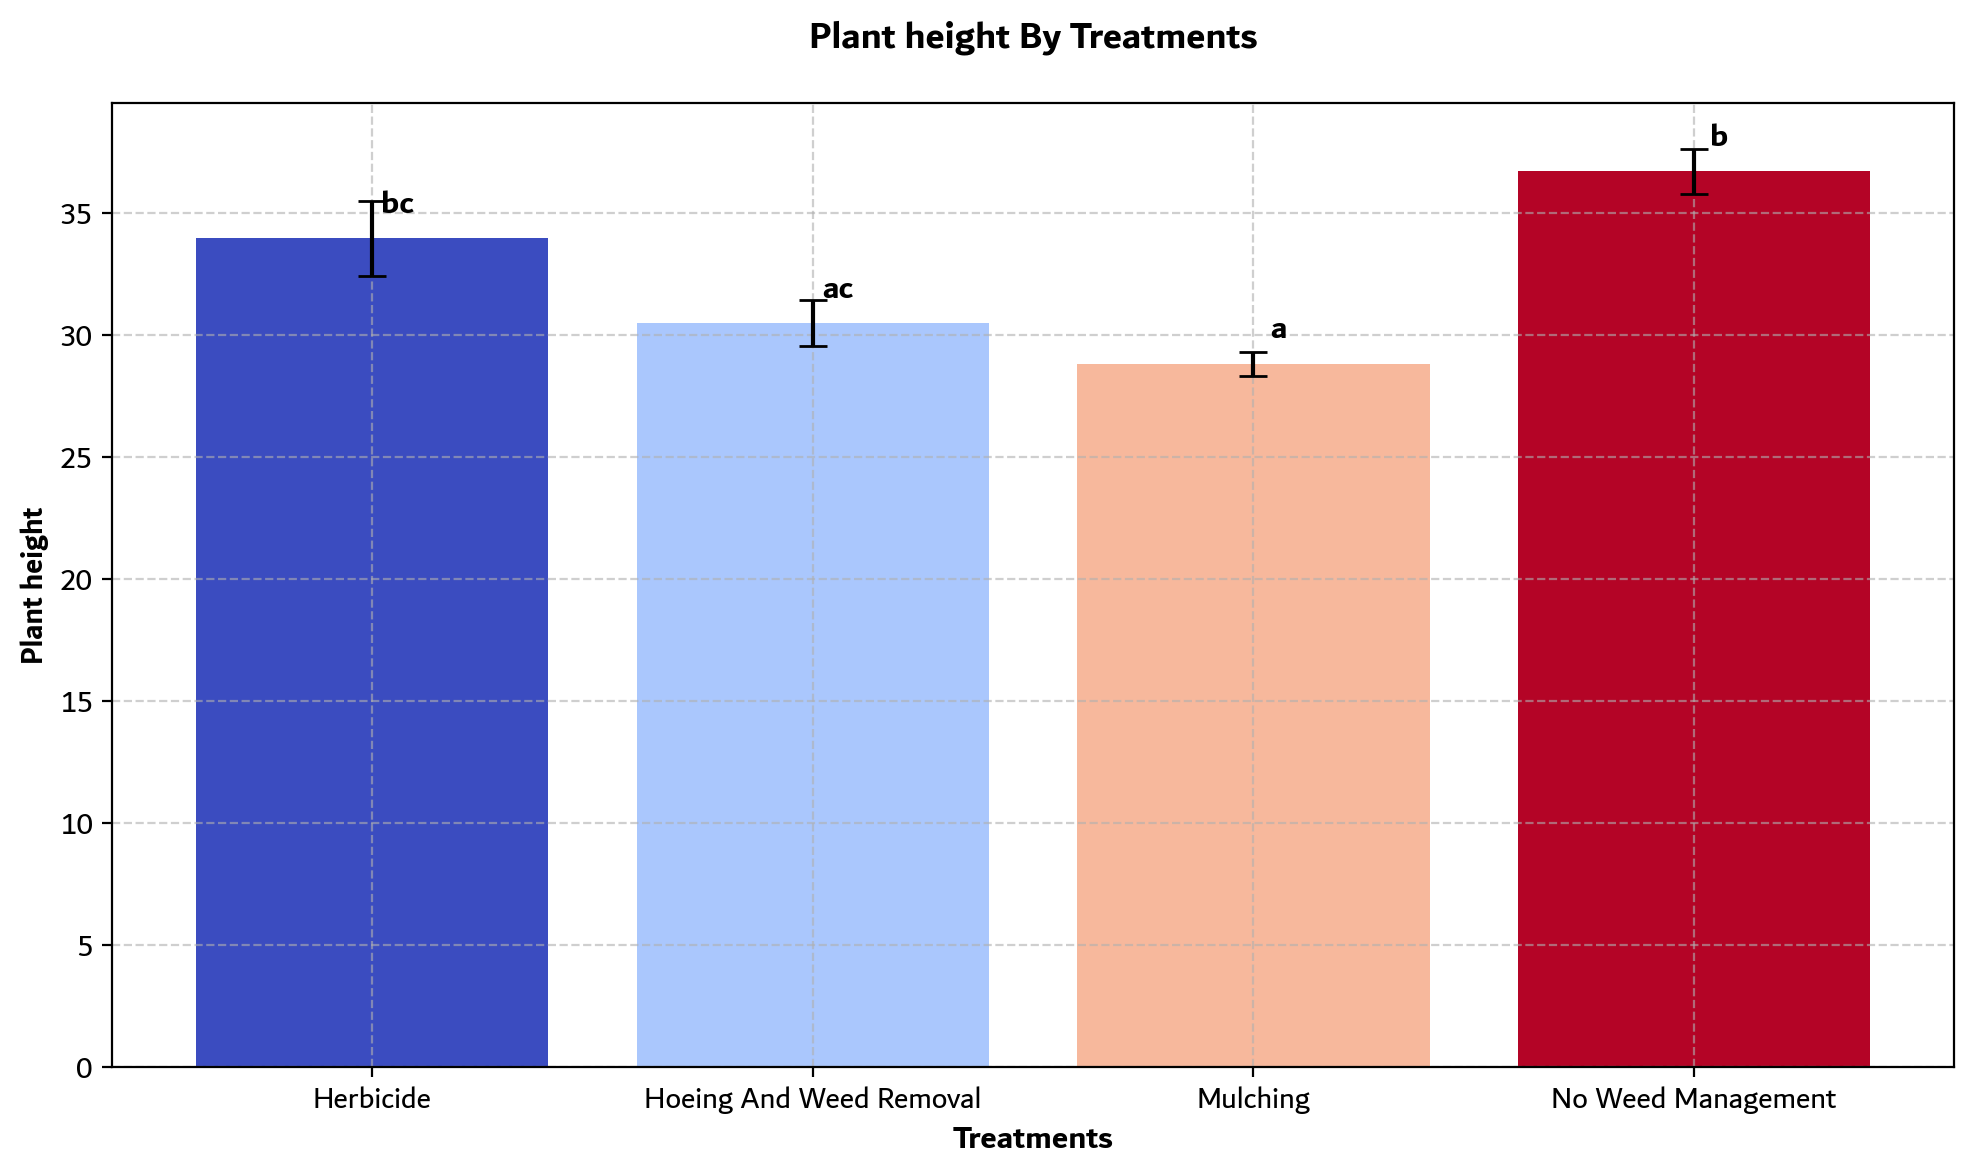

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

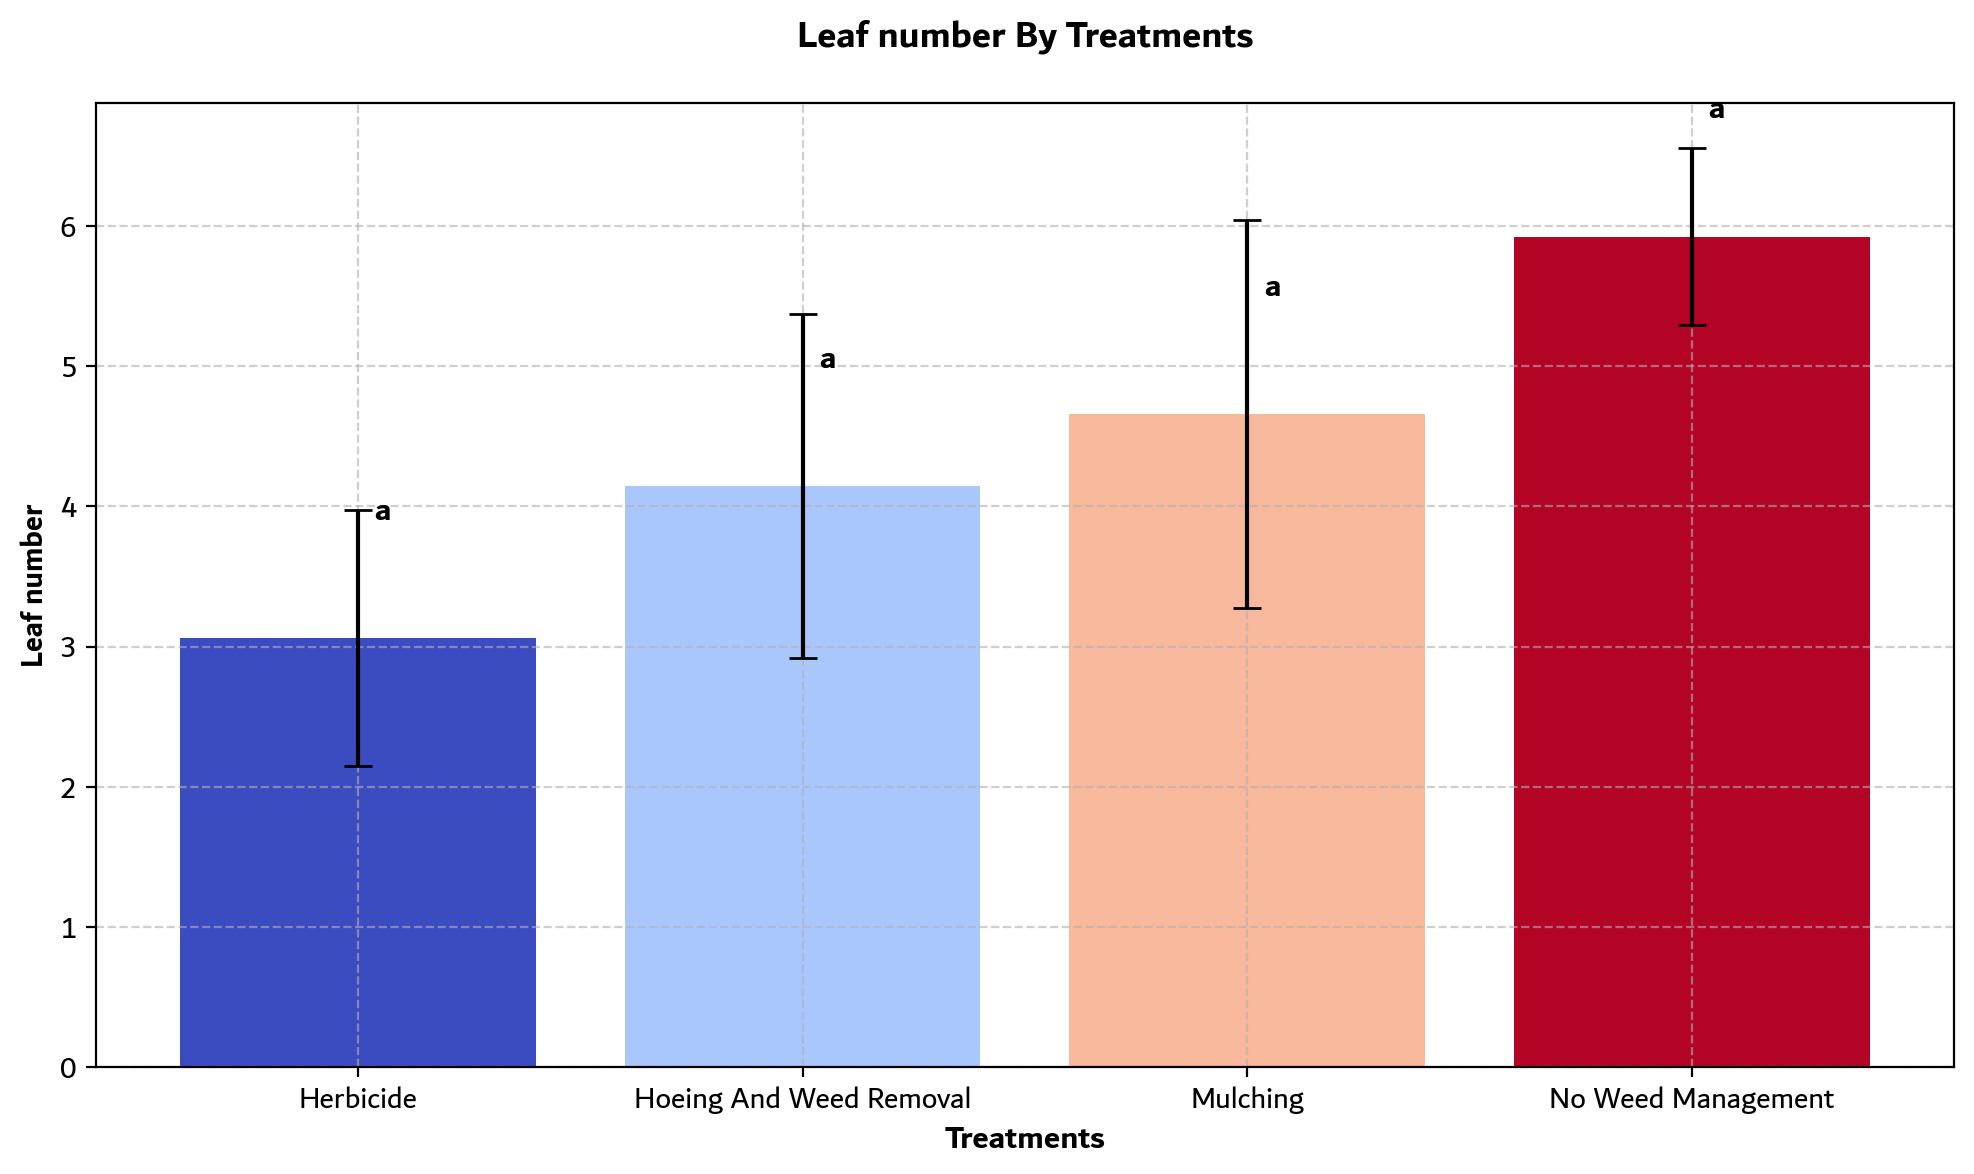

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

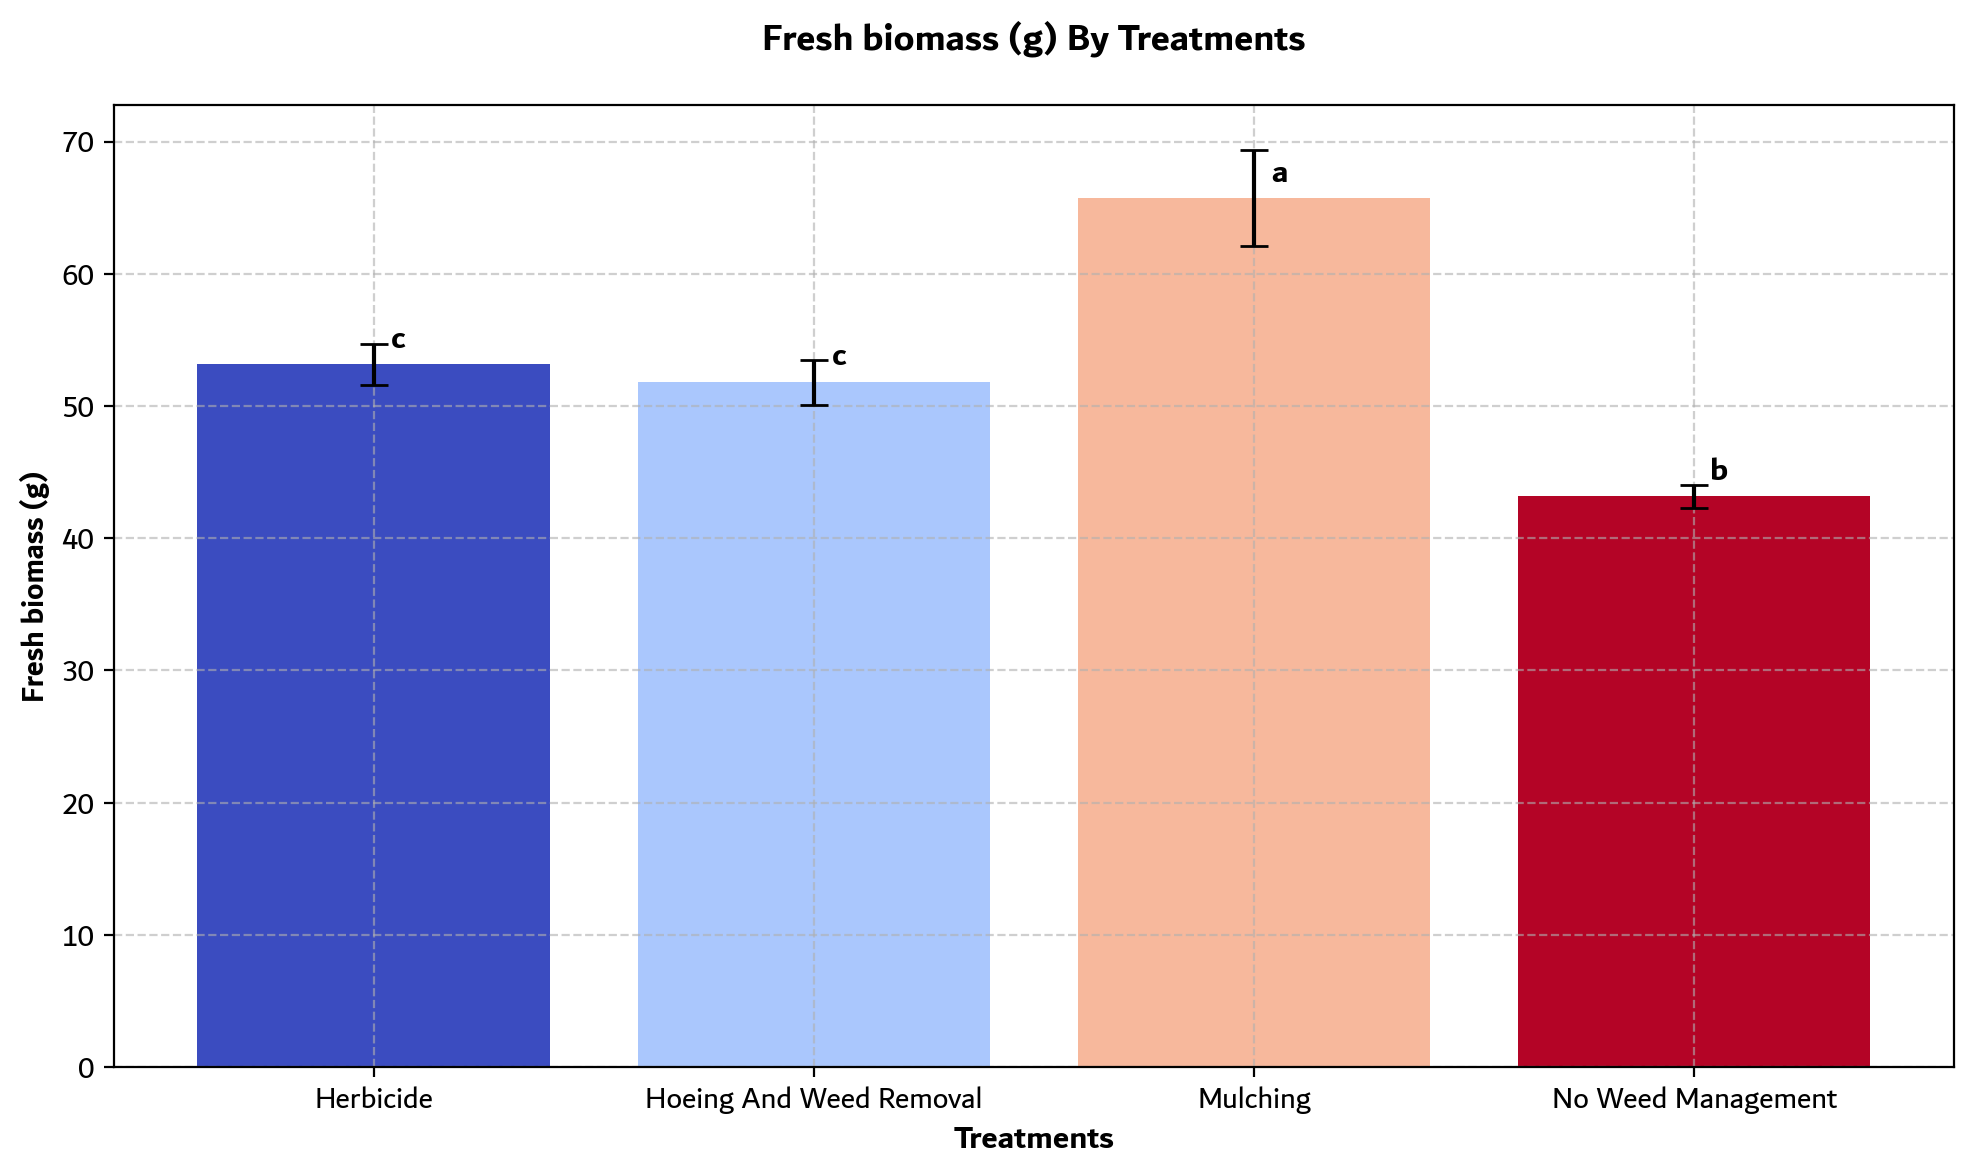

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

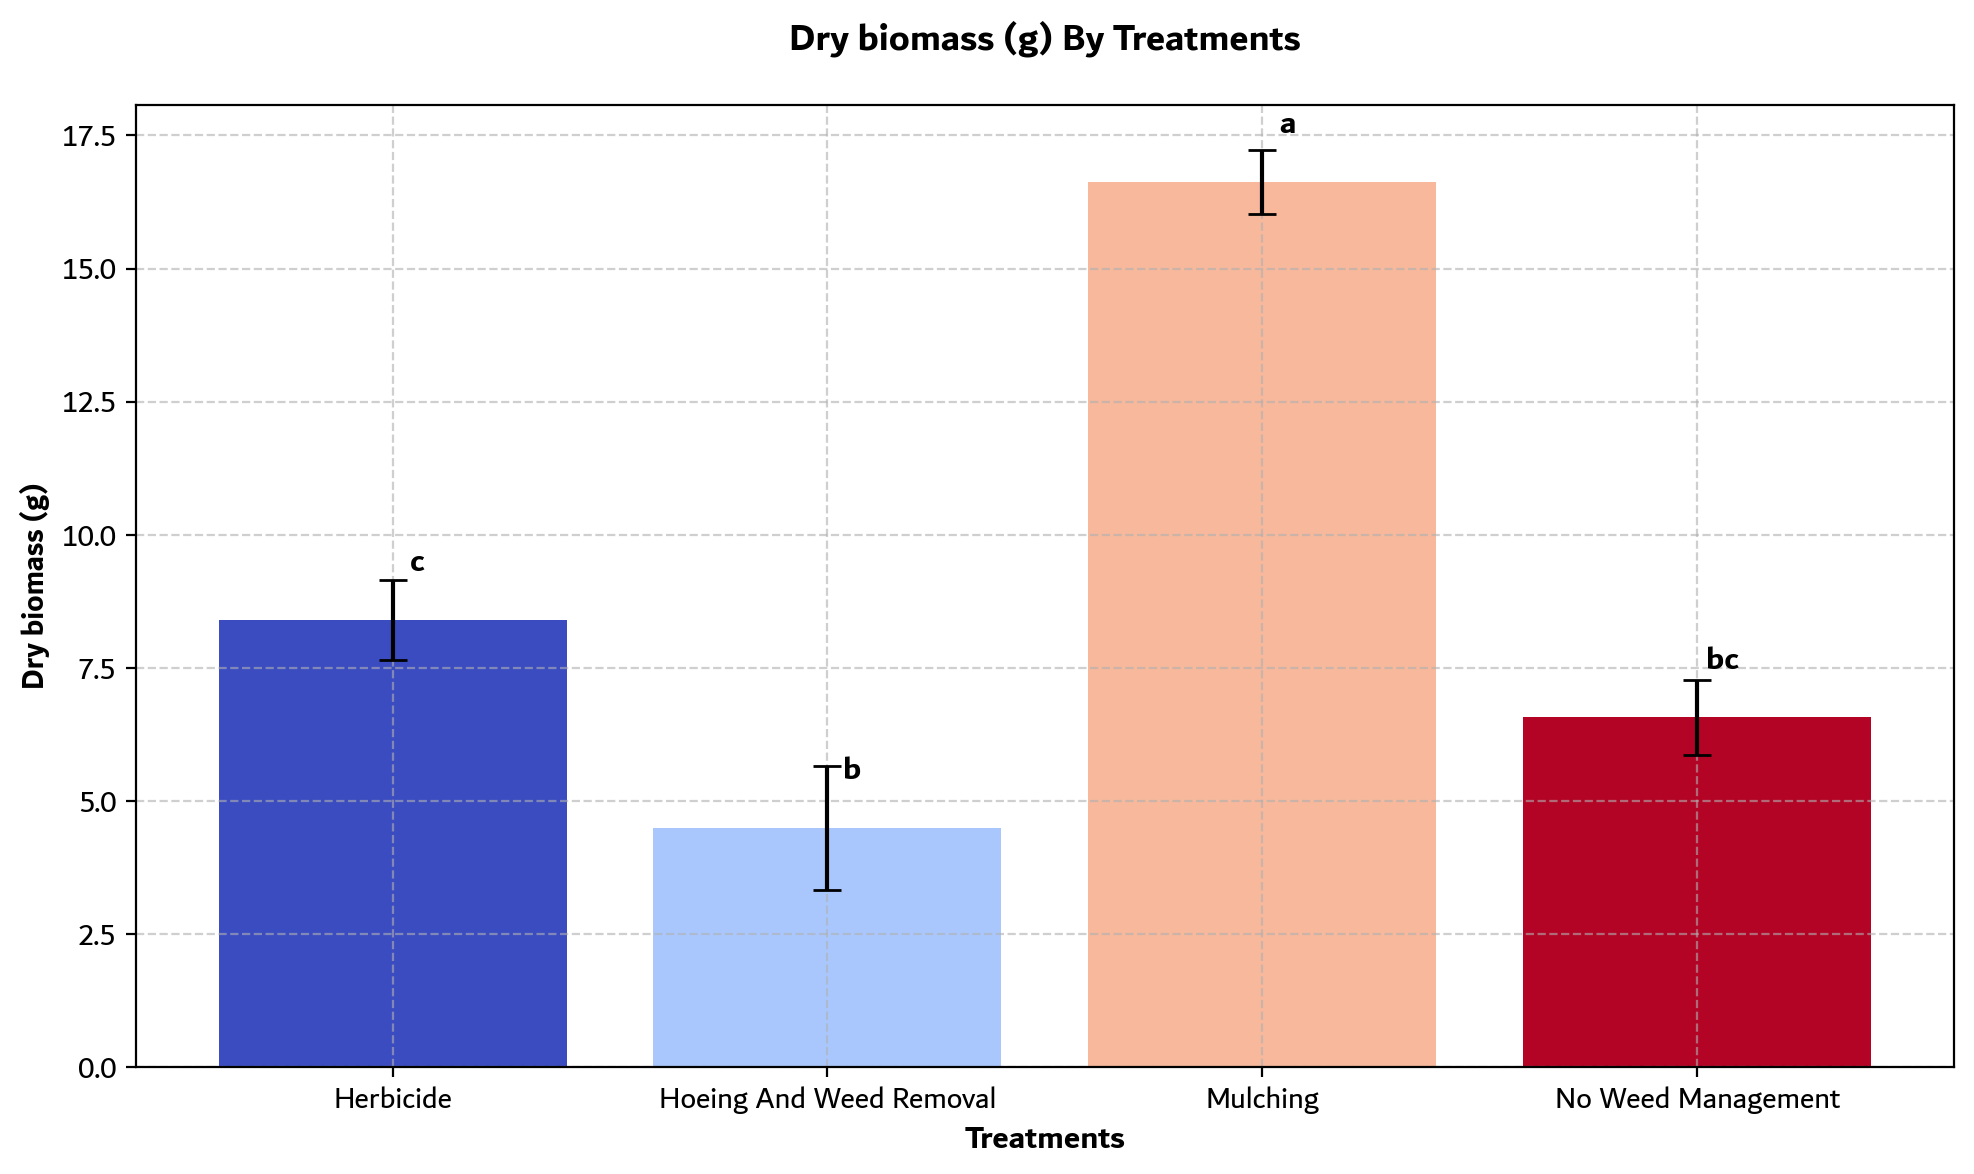

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

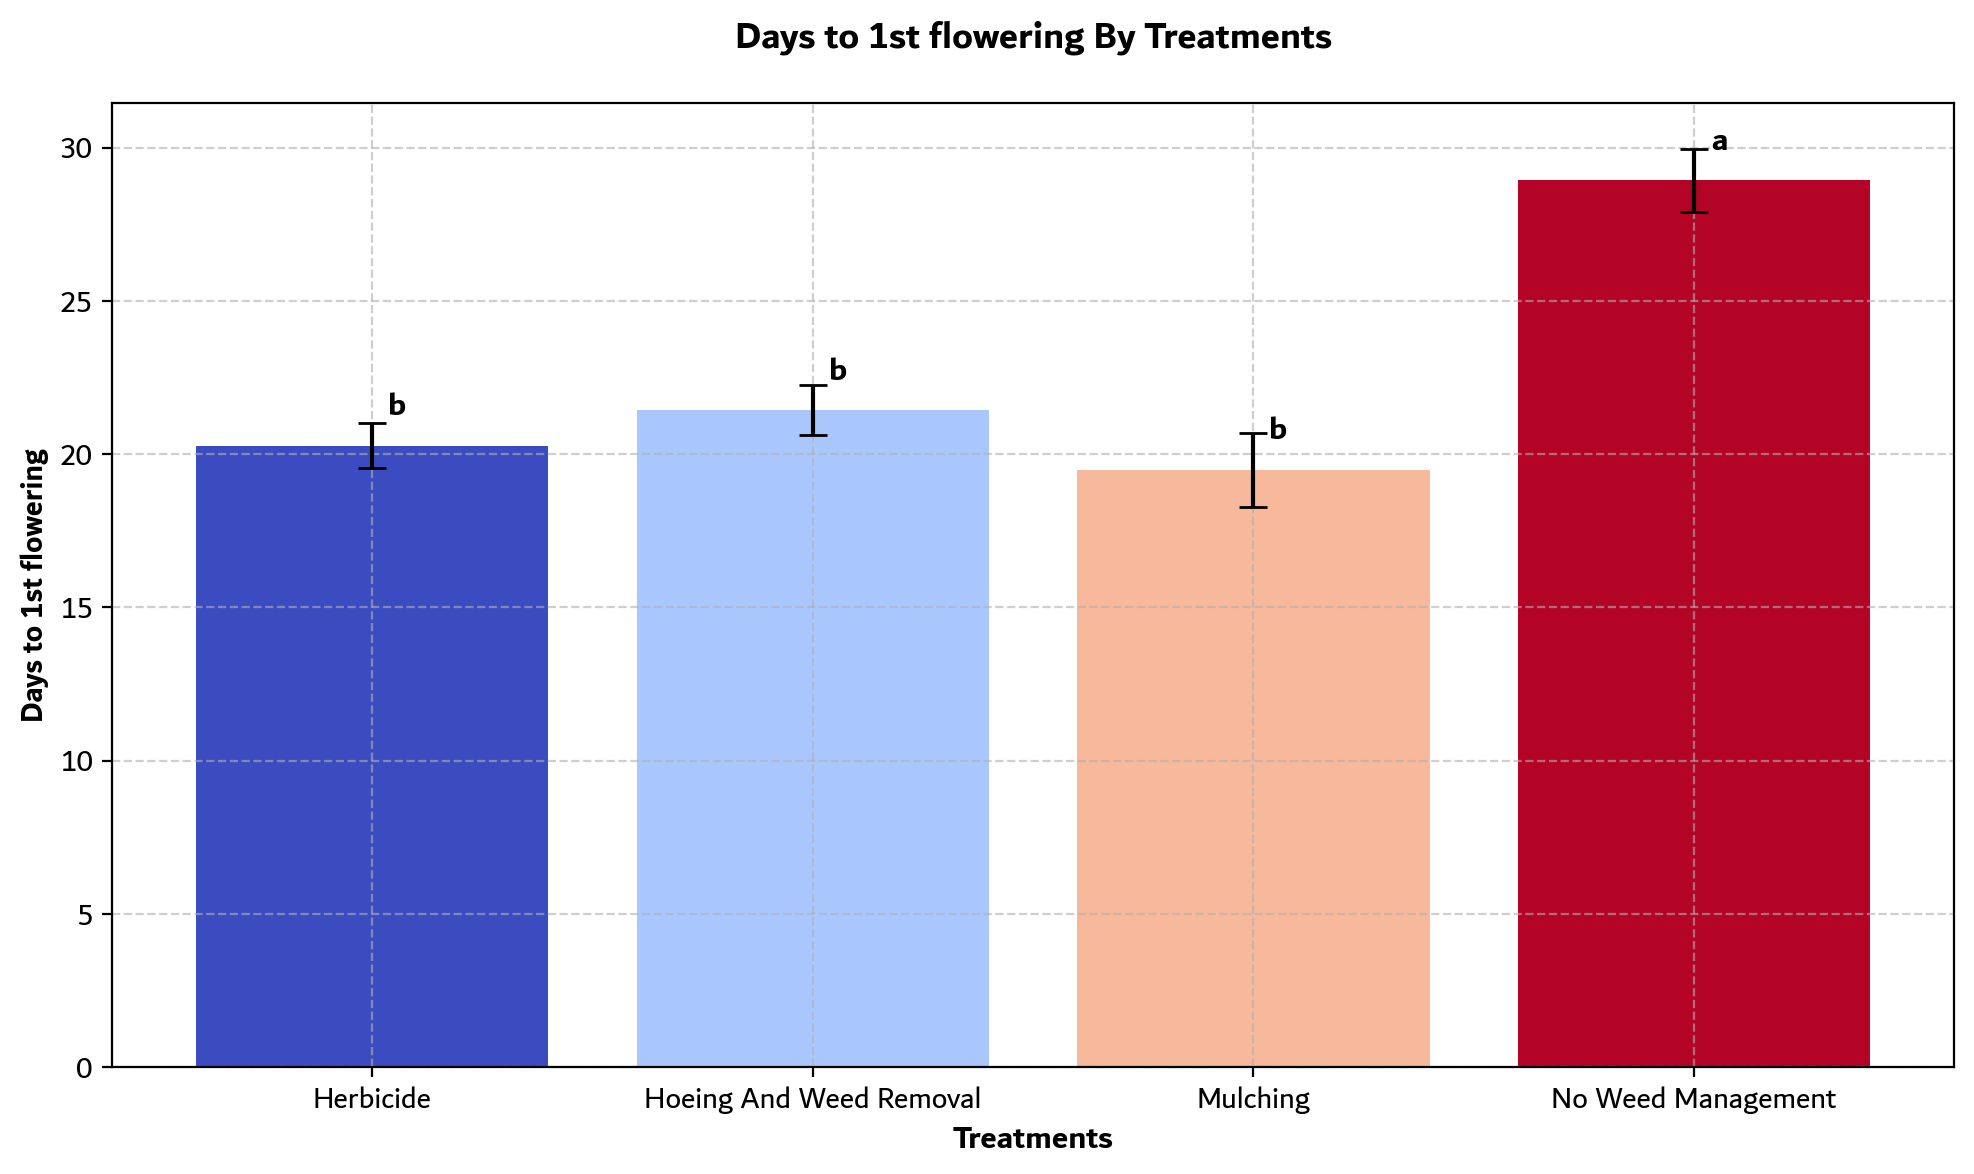

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

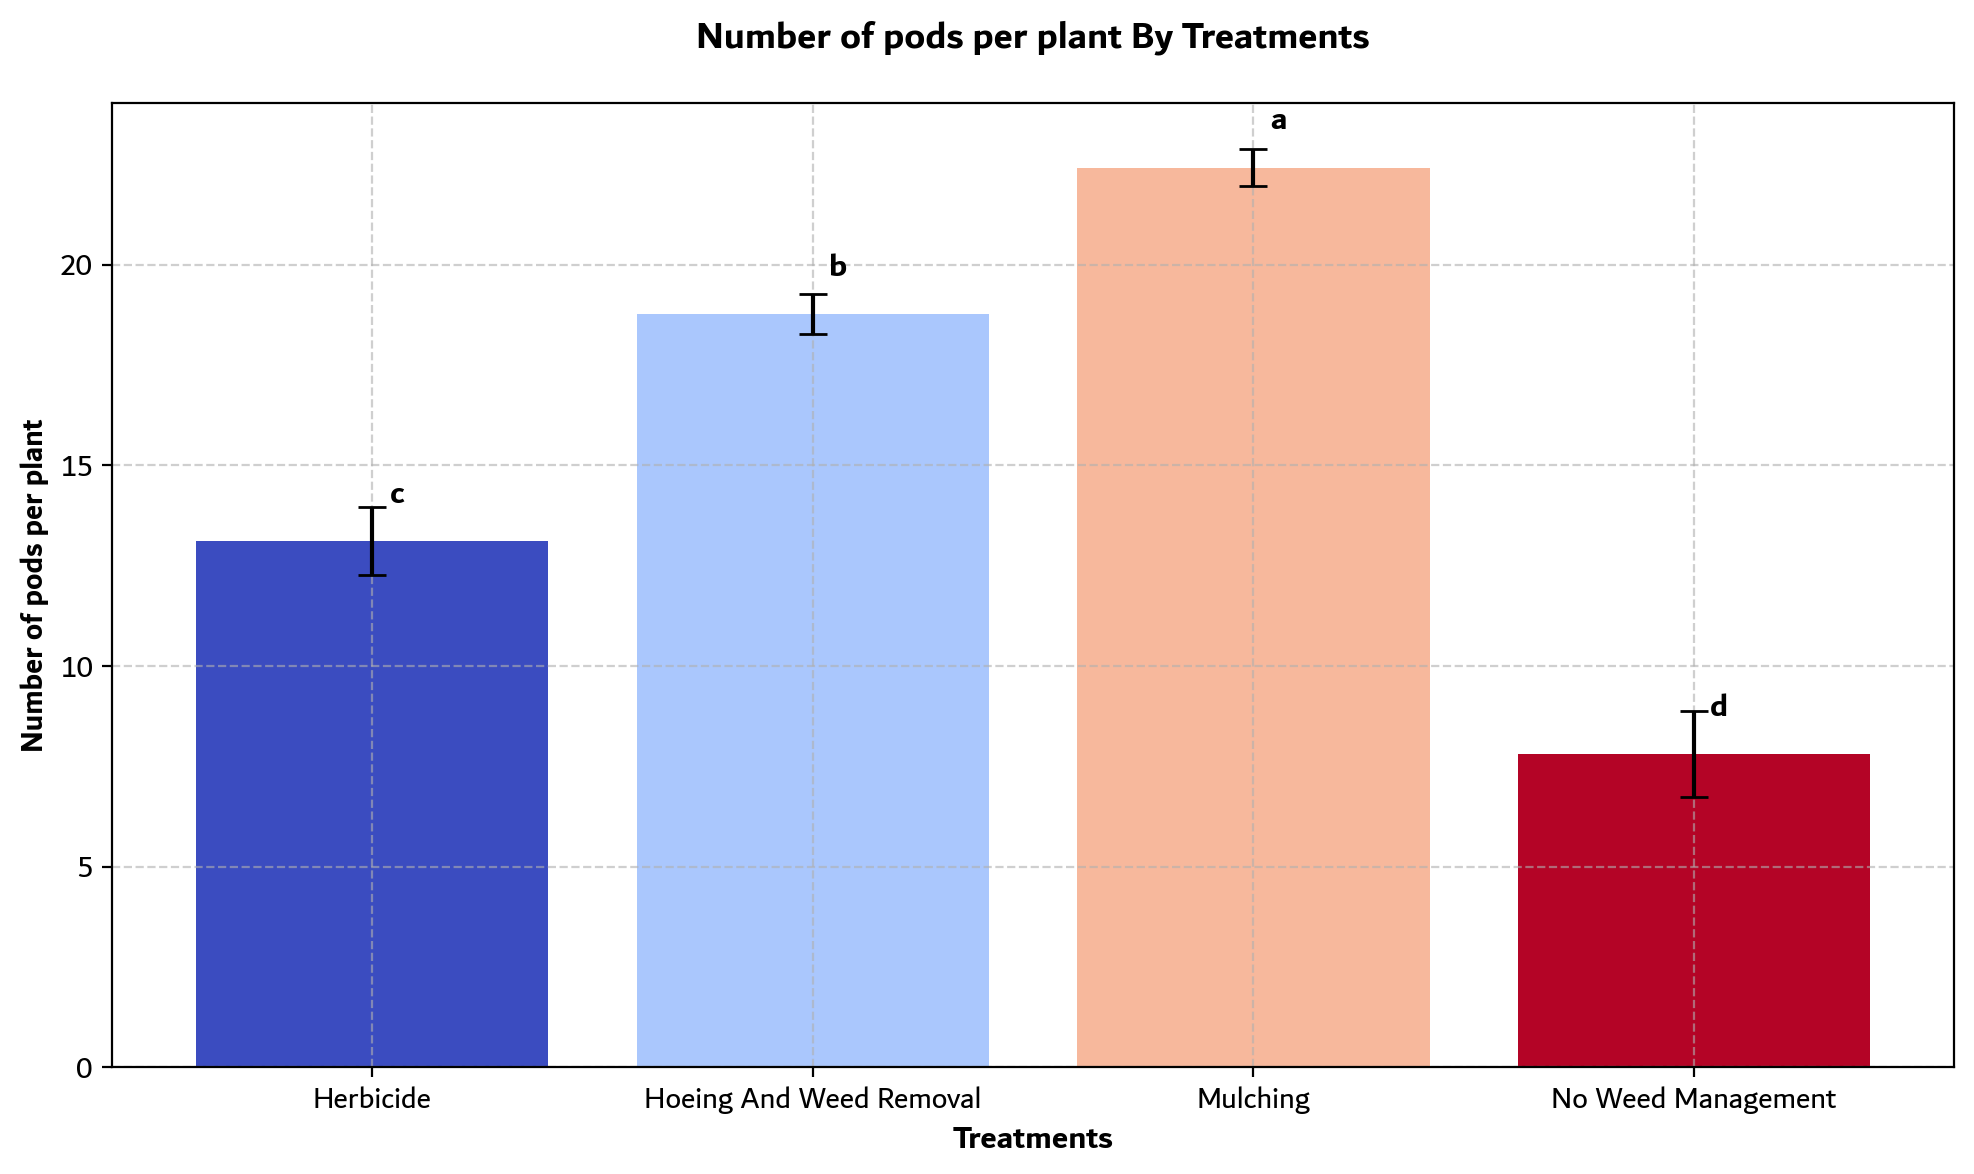

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

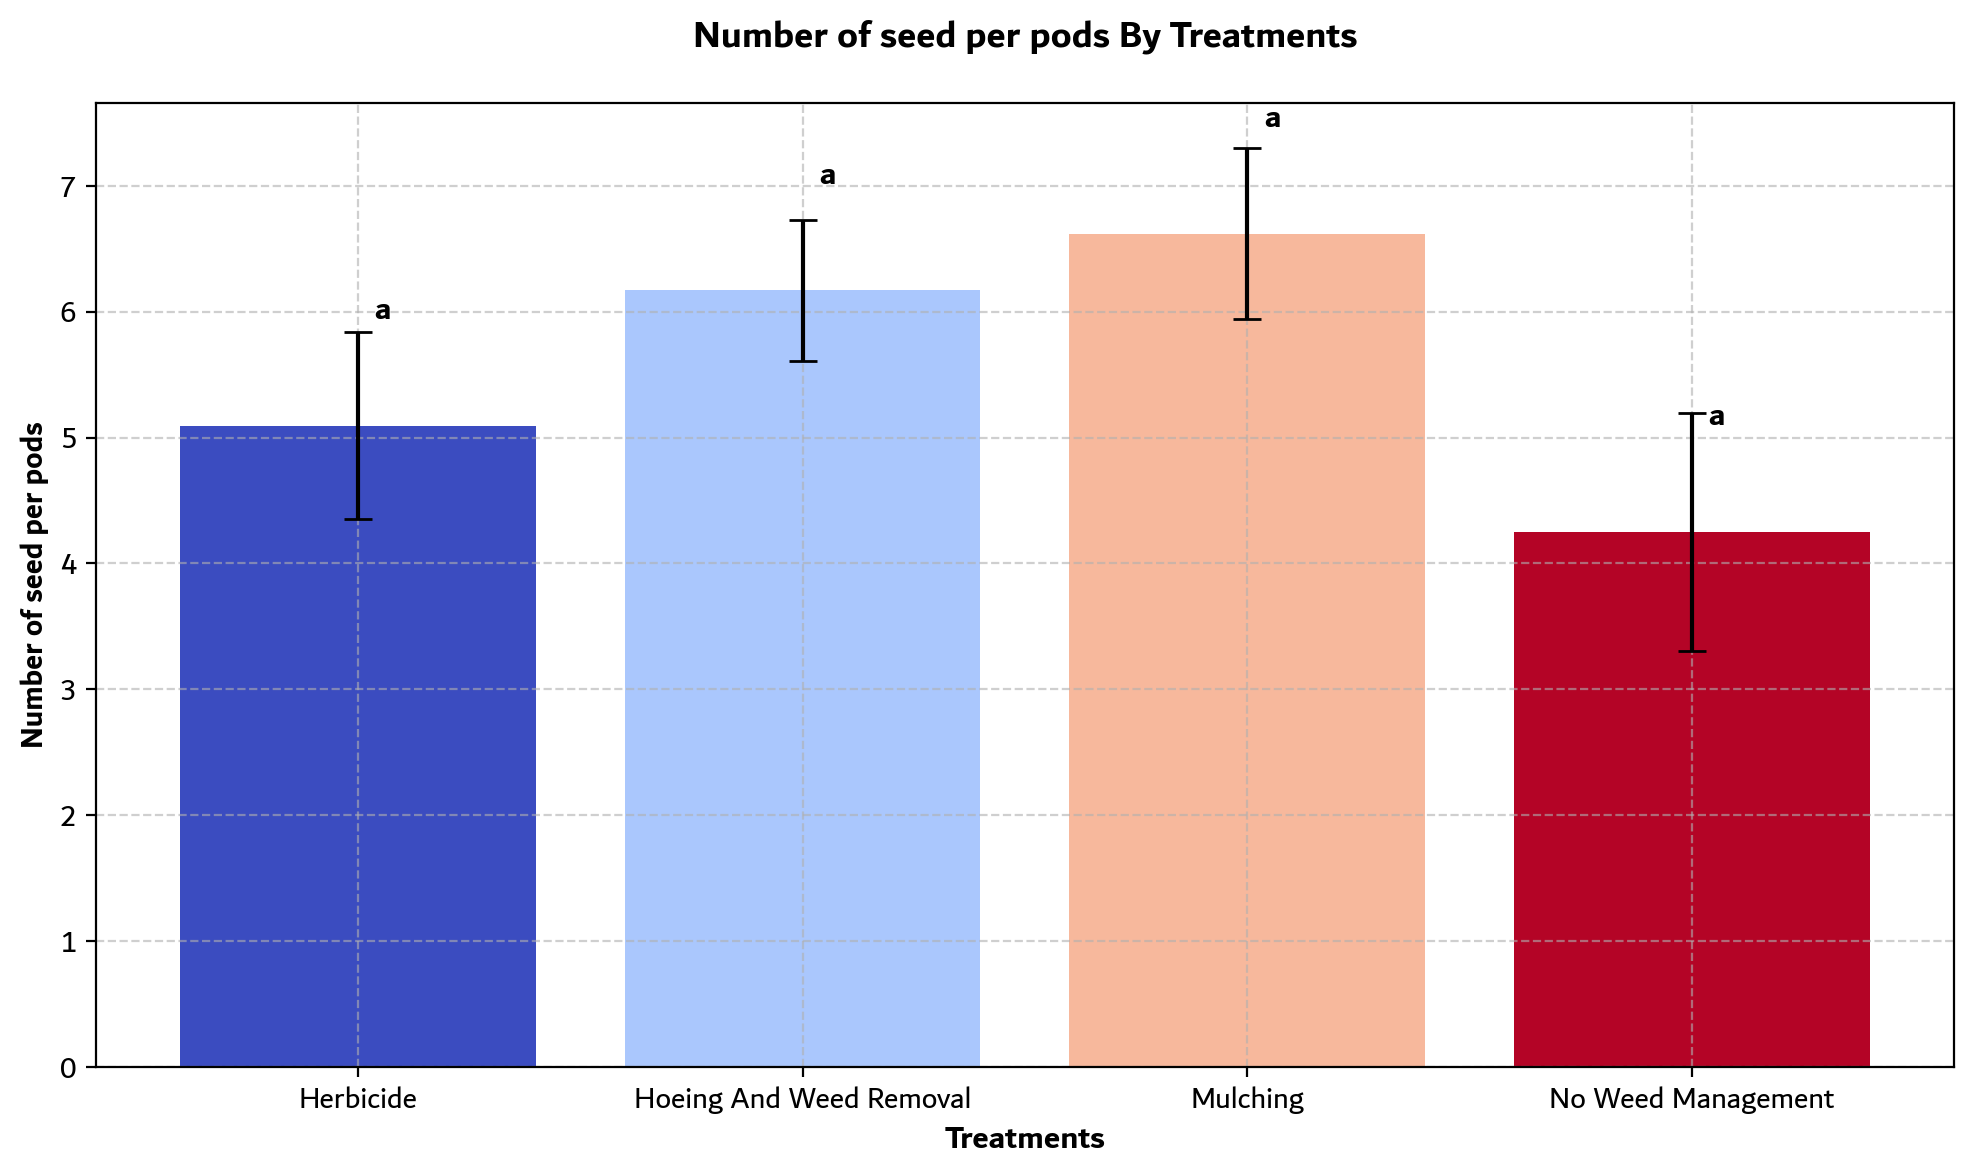

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

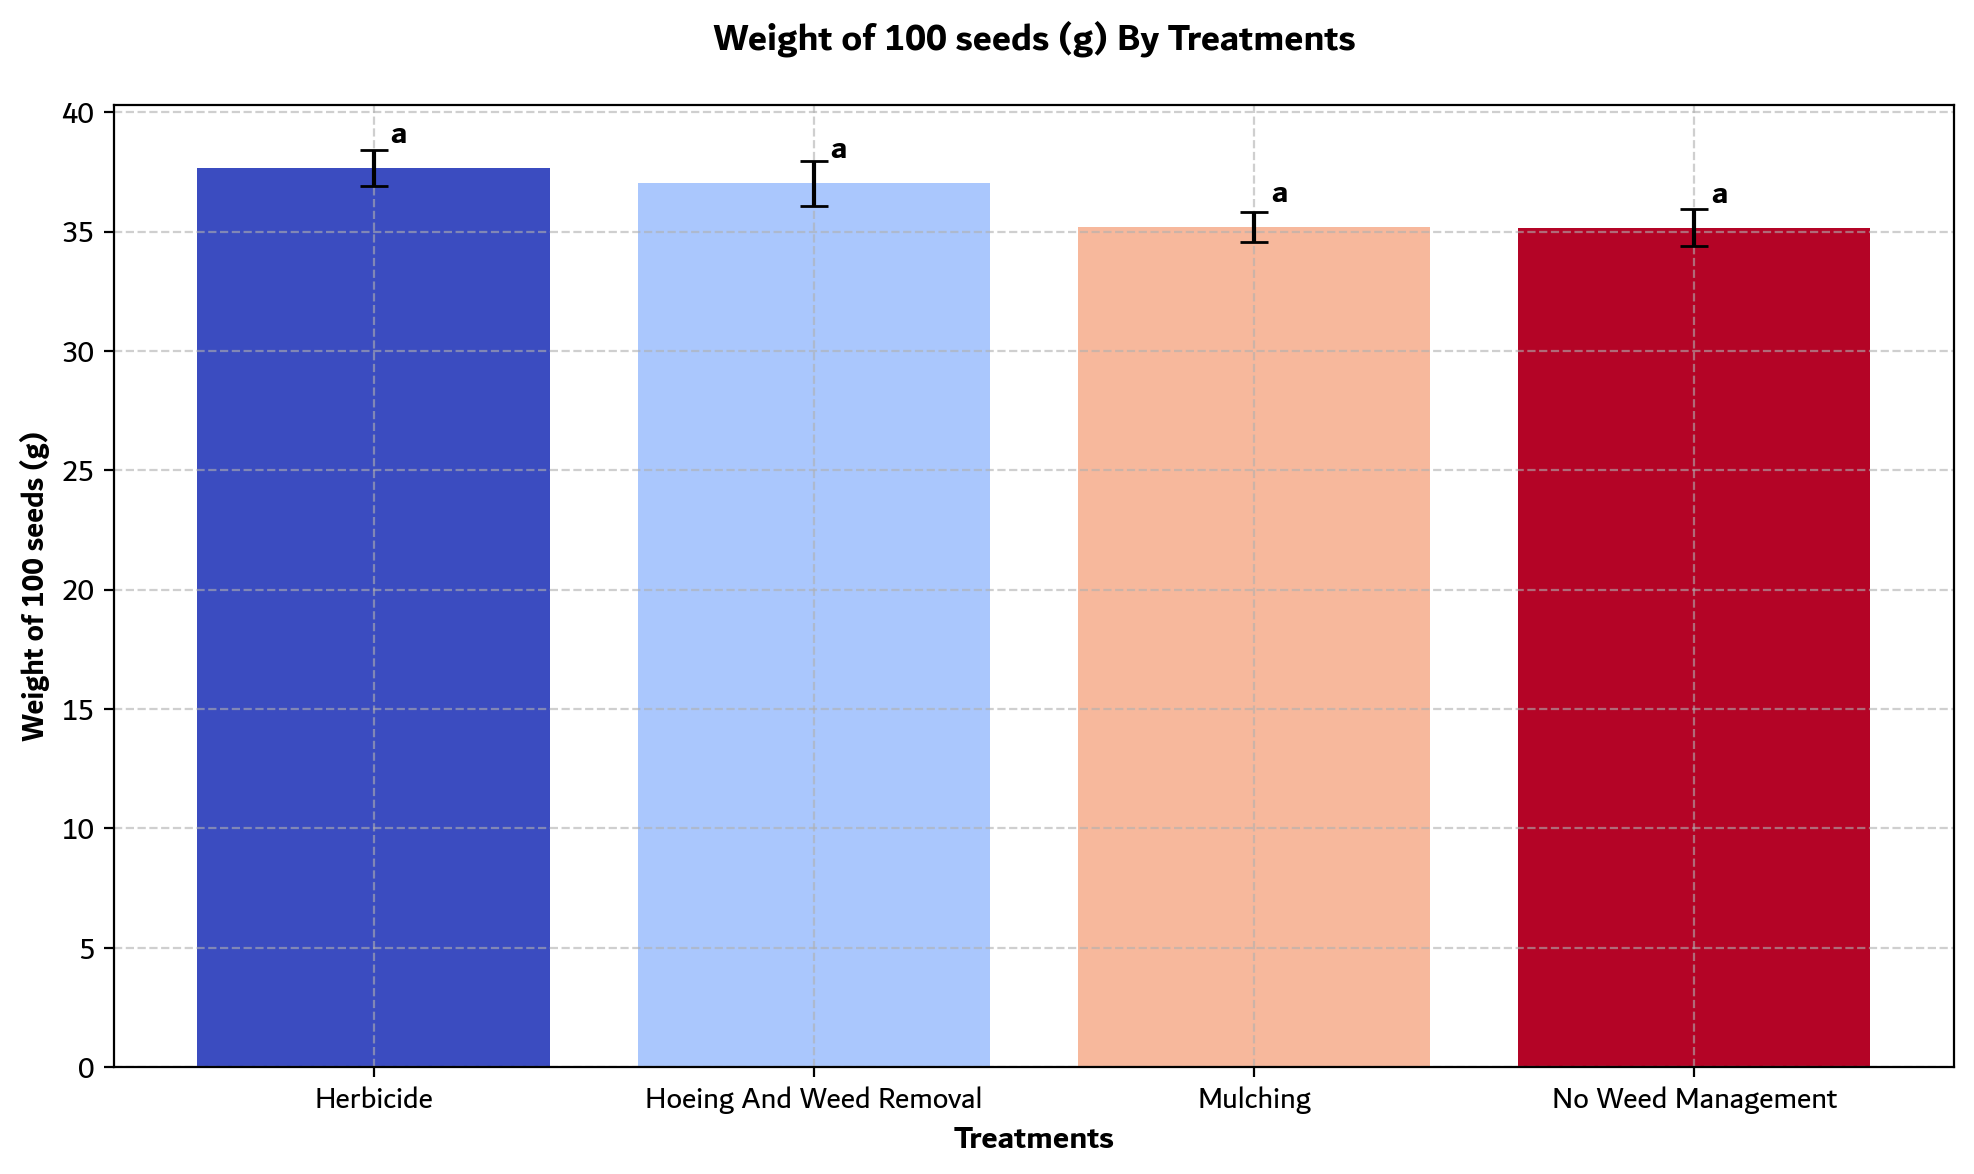

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

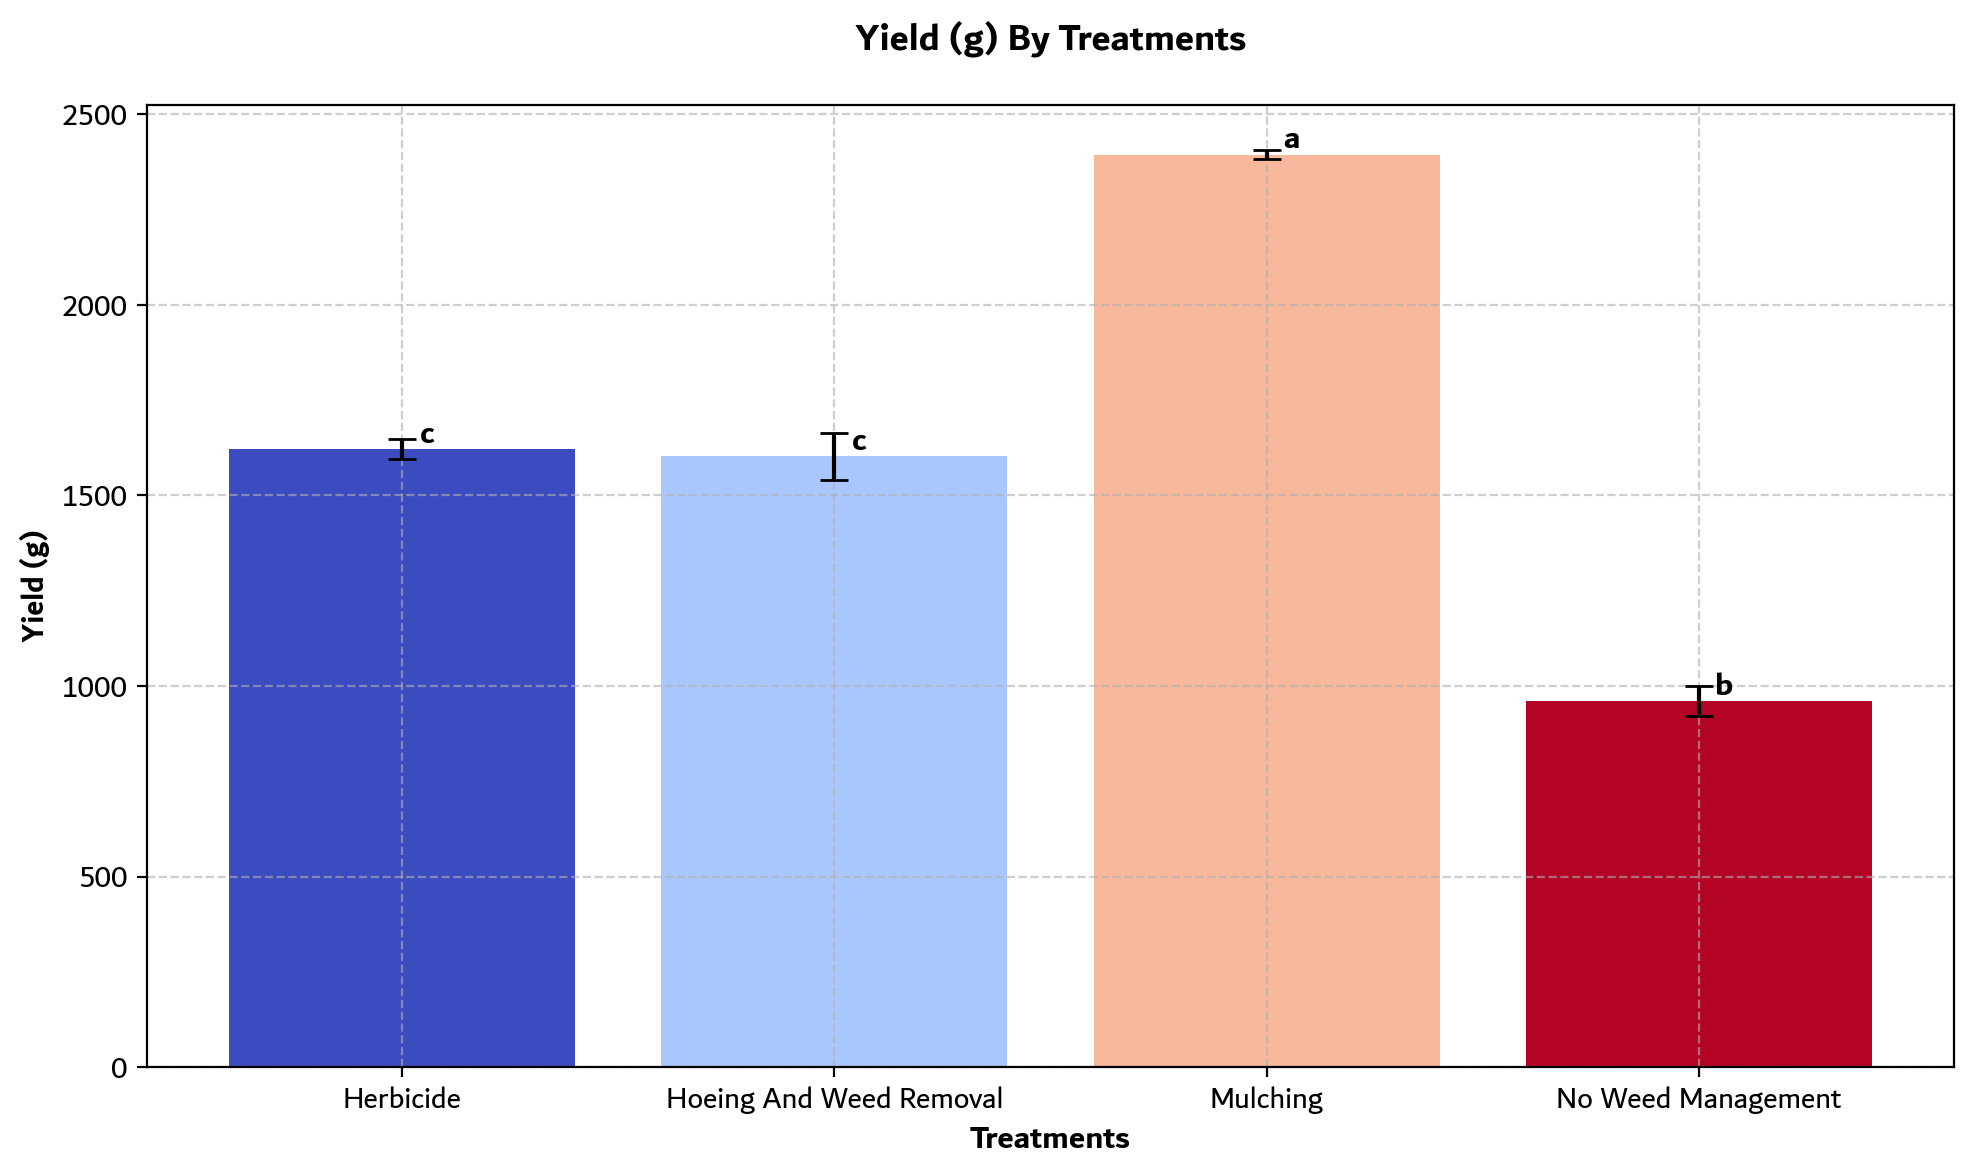

In [32]:
for col in Metrics:
    col = rename(ColumnName=col)
    Category = rename(ColumnName='Treatments')
    df.columns = df.columns.to_series().apply(rename)
    
    Turkey= pairwise_tukeyhsd(df[col], groups= df[Category])
    Turkeyresults = pd.DataFrame(data=Turkey._results_table.data[1:], columns=Turkey._results_table.data[0])
    group_labels = letters(Turkeyresults)
    
    Aggregate_df=df.groupby(Category)[col].agg(['mean', 'sem']).reset_index()
    
    plt.figure(figsize=(10, 6), dpi=200)
    error = np.full(len(Aggregate_df), Aggregate_df['sem'])
    custom_letters = group_labels
    
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(Aggregate_df)))
    bars = plt.bar(Aggregate_df[Category], Aggregate_df['mean'], yerr=error, color=colors, capsize=5)
    
    for bar, Produce in zip(bars, Aggregate_df[Category]):
        height = bar.get_height()
        plt.annotate( custom_letters[Produce],
            xy=(bar.get_x() + bar.get_width() / 2, height + 0.8),
            xytext=(9, 0),
            textcoords="offset points",
            ha='center', va='bottom', fontsize=12, fontweight='bold'
        )

    column_name = restore_name(col)
    category_name = restore_name(Category)
    plt.xticks(ticks=range(len(Aggregate_df[Category])),labels=Aggregate_df[Category], rotation=0, ha='center')
    plt.xlabel(category_name, fontsize=12, fontweight='bold',)
    plt.ylabel(column_name, fontsize=11, fontweight='bold',)
    
    plt.grid(linestyle='--', alpha=0.6)
    plt.title(f'{column_name} By {category_name}', fontsize=14, fontweight='bold', pad=20)
    plt.savefig(f"Visualization(Figures)/{column_name} cld.png")
    plt.tight_layout()
    plt.show()

 This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via email at **[Jabulente@hotmai.com]**

<h5 style='font-size: 65px; color: crimson; font-family: Amh5erzand; font-weight: 600; text-align: center'>THE END</h5>